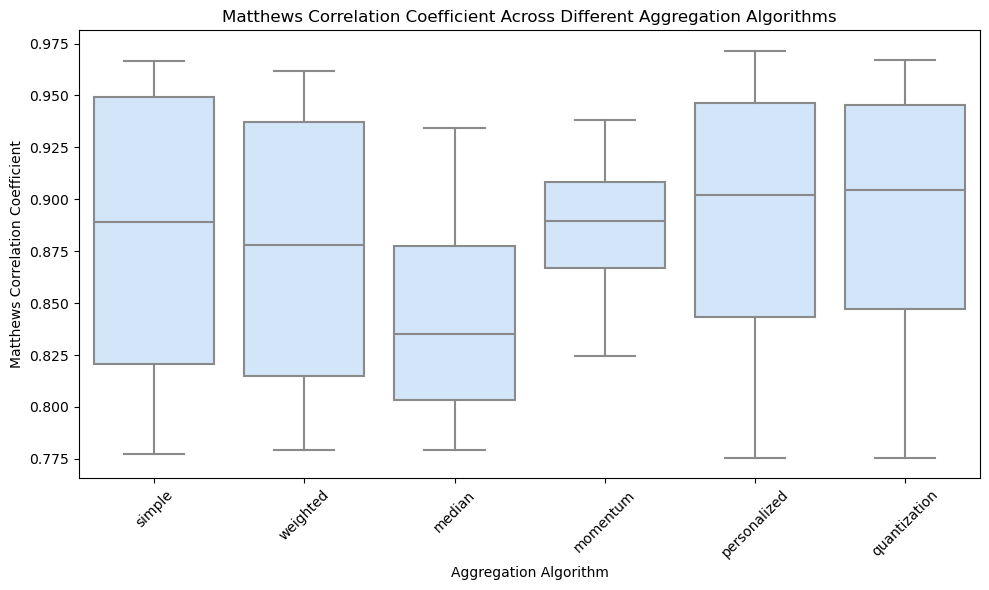

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Accuracy,Precision,Recall,F1-Score,Matthews Correlation Coefficient
# Load the CSV file
file_path = 'evaluation_results.csv'  # 请替换为你的文件路径
data = pd.read_csv(file_path)

# Extract the aggregation algorithm name from the "Model Name" column
data['Aggregation Algorithm'] = data['Model Name'].apply(lambda x: x.split('_')[-1].replace('.pth', ''))

# Reorder the aggregation algorithms according to the specified order
order = ['simple', 'weighted', 'median', 'momentum', 'personalized','quantization']# 'dp'
data['Aggregation Algorithm'] = pd.Categorical(data['Aggregation Algorithm'], categories=order, ordered=True)
data = data.sort_values('Aggregation Algorithm')

# Plot the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Aggregation Algorithm', y='Matthews Correlation Coefficient', data=data,color='#CCE5FF')
plt.title('Matthews Correlation Coefficient Across Different Aggregation Algorithms')
plt.ylabel('Matthews Correlation Coefficient')
plt.xlabel('Aggregation Algorithm')
plt.xticks(rotation=45)
plt.tight_layout()

# 调整图片的左右留白
#plt.subplots_adjust(left=0.1, right=3.0)
# Save the plot as a PDF file
plt.savefig('boxplot_MCC.pdf')
plt.savefig('boxplot_MCC.jpg')
plt.show()